In [ ]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# step 1
metrics = {
    "E1e-01": [61.81, 48.49, 38.24, 29.70],
    "E2e-01": [61.81, 40.13, 25.42, 15.05],
    "E5e-02": [61.81, 54.25, 47.20, 41.31],
}

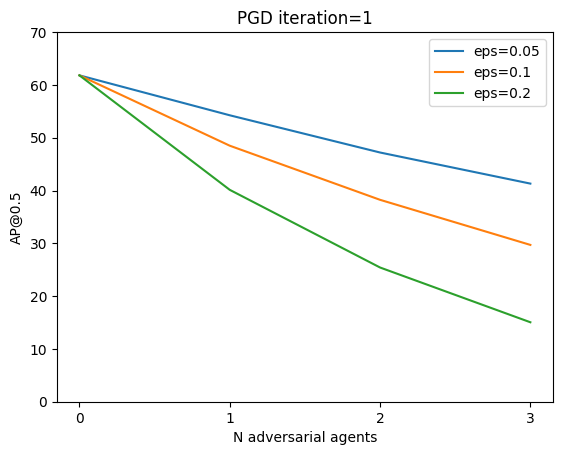

In [3]:
plt.plot([0, 1, 2, 3], metrics["E5e-02"], label='eps=0.05')
plt.plot([0, 1, 2, 3], metrics["E1e-01"], label='eps=0.1')
plt.plot([0, 1, 2, 3], metrics["E2e-01"], label='eps=0.2')
plt.xlabel("N adversarial agents")
plt.xticks([0, 1, 2, 3])
plt.ylabel("AP@0.5")
plt.ylim(0, 70)
plt.title("PGD iteration=1")
plt.legend()
plt.show()

In [4]:
# step 10
metrics = {
    "E1e-01": [61.81, 29.16, 15.27, 9.12],
    "E2e-01": [61.81, 12.04,  4.63, 2.07],
    "E5e-02": [61.81, 48.67, 38.16, 30.59],
}

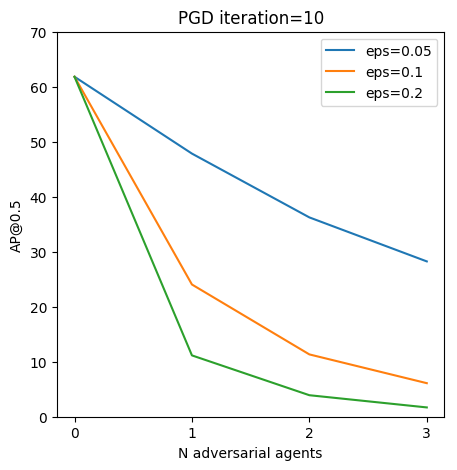

In [11]:
figure = plt.figure(figsize=(5,5))
plt.plot([0, 1, 2, 3], metrics["E5e-02"], label='eps=0.05')
plt.plot([0, 1, 2, 3], metrics["E1e-01"], label='eps=0.1')
plt.plot([0, 1, 2, 3], metrics["E2e-01"], label='eps=0.2')
plt.xlabel("N adversarial agents")
plt.xticks([0, 1, 2, 3])
plt.ylabel("AP@0.5")
plt.ylim(0, 70)
plt.title("PGD iteration=10")
plt.legend()
plt.show()

In [6]:
# step 20
metrics = {
    "E1e-01": [61.81, 24.04, 11.33,  6.10],
    "E2e-01": [61.81, 11.15,  3.91,  1.69],
    "E5e-02": [61.81, 47.84, 36.24, 28.24],
}

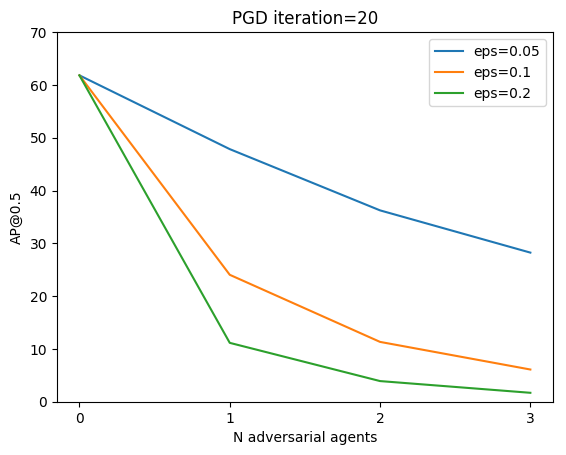

In [7]:
plt.plot([0, 1, 2, 3], metrics["E5e-02"], label='eps=0.05')
plt.plot([0, 1, 2, 3], metrics["E1e-01"], label='eps=0.1')
plt.plot([0, 1, 2, 3], metrics["E2e-01"], label='eps=0.2')
plt.xlabel("N adversarial agents")
plt.xticks([0, 1, 2, 3])
plt.ylabel("AP@0.5")
plt.ylim(0, 70)
plt.title("PGD iteration=20")
plt.legend()
plt.show()

In [6]:
import pickle
import numpy as np

In [2]:
with open("/DB/data/yanghengzhao/adversarial/DiscoNet/experiments/single_view_pgd_0.1-10-n1-pred/match_costs/82_0.pkl", 'rb') as f:
    data = pickle.load(f)

In [7]:
match_cost = np.array(data['match_costs'])

In [8]:
match_cost.shape

(3, 3, 4)

In [10]:
with open("../experiments/match_cost/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)

In [23]:
mc = np.array(data['match_cost'][201])[:, 0]
mc

array([[1.27889787, 1.31957211, 0.87361244, 0.87530782],
       [0.82550047, 0.42965535, 0.70512256, 0.46678297],
       [0.82991336, 0.57929639, 0.68365958, 0.52817005]])

In [16]:
with open("../experiments/match_cost_unsupervised/result.pkl", 'rb') as f:
    data2 = pickle.load(f)

In [24]:
data2['match_costs'][201]

[array([[1.27889787, 0.73962594, 0.76695986, 0.49612467],
        [0.82550047, 0.78699092, 0.70512256, 0.52383611],
        [0.82991336, 0.87248567, 0.68833993, 0.52817005]]),
 array([[0.71755941, 1.31957211, 0.76613792, 0.49612467],
        [0.81342237, 0.42965535, 0.66644437, 0.46678297],
        [0.82991336, 0.57929639, 0.74703566, 0.56417082]]),
 array([[0.71755941, 0.58783972, 0.87361244, 0.49280406],
        [0.82550047, 0.51803252, 0.70512256, 0.4751508 ],
        [0.81365864, 0.57929639, 0.68365958, 0.57243567]]),
 array([[0.42740402, 0.58783972, 0.76695986, 0.87530782],
        [0.3320632 , 0.42965535, 0.66443013, 0.46678297],
        [0.44691765, 0.75894109, 0.68365958, 0.52817005]])]

In [25]:
data2['score'][201]

array([4.76409865, 0.65449148, 0.69449004, 3.39649103, 1.4198533 ,
       0.60997672, 1.60816675, 0.46902333, 0.32391427, 1.68515221,
       0.48446707, 0.15844871])

In [26]:
data2.keys()

dict_keys(['total', 'correct', 'score', 'label', 'pred', 'match_costs'])

match loss distribution

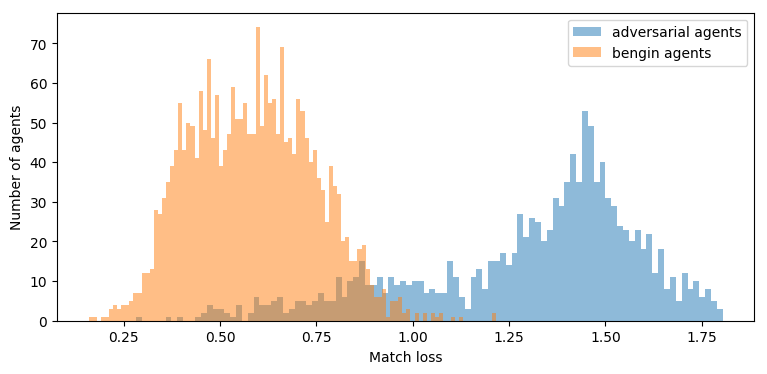

In [4]:
with open("../experiments/match_cost_v2/gt/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)
label = np.concatenate([l for l in data['label'] if len(l) == 12])
score = np.concatenate([s for s in data['score'] if len(s) == 12])
# label = np.concatenate([l for l in data['label']])
# score = np.concatenate([s for s in data['score']])

adv = score[label == 1]
benign = score[label == 0]

figure = plt.figure(figsize=(9,4))
plt.hist(adv, bins=100, alpha=0.5, label="adversarial agents")
plt.hist(benign, bins=100, alpha=0.5, label="bengin agents")
plt.ylabel('Number of agents')
plt.xlabel("Match loss")
plt.legend()
# sns.displot(adv, bins=50, kde=True)
# sns.displot(benigne, bins=25)
plt.show()

reconstruction loss distribution

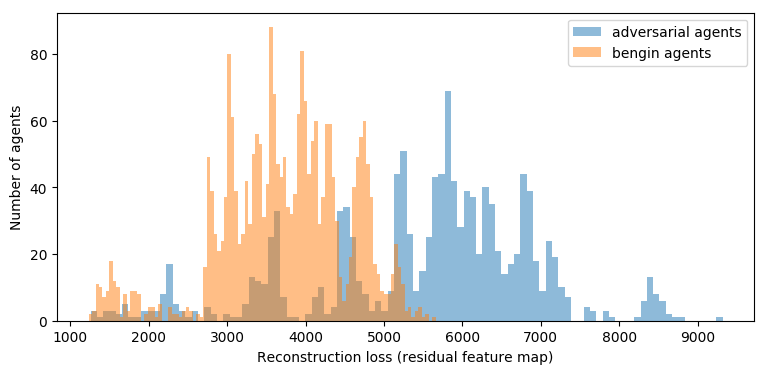

In [5]:
with open("../experiments/residual_ae_v2/gt/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)

label = np.concatenate([l for l in data['label'] if len(l) == 12])
score = np.concatenate([s for s in data['score'] if len(s) == 12])
# label = np.concatenate([l for l in data['label']])
# score = np.concatenate([s for s in data['score']])

adv = score[label == 1]
benign = score[label == 0]

figure = plt.figure(figsize=(9,4))
plt.hist(adv, bins=100, alpha=0.5, label="adversarial agents")
plt.hist(benign, bins=100, alpha=0.5, label="bengin agents")
plt.ylabel('Number of agents')
plt.xlabel("Reconstruction loss (residual feature map)")
plt.legend()
# sns.displot(adv, bins=50, kde=True)
# sns.displot(benigne, bins=25)
plt.show()

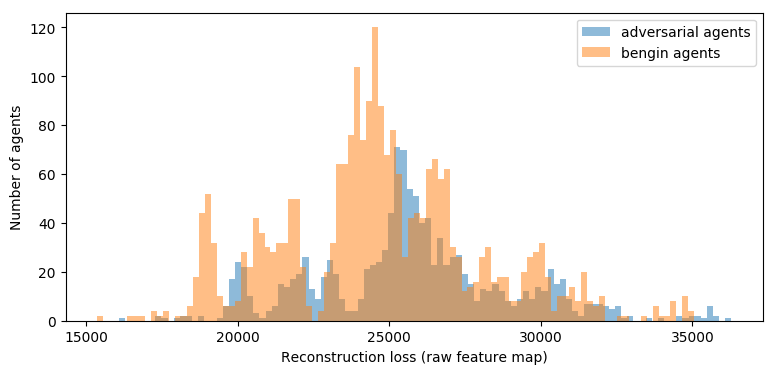

In [6]:
with open("../experiments/raw_ae/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)

label = np.concatenate([l for l in data['label'] if len(l) == 12])
score = np.concatenate([s for s in data['score'] if len(s) == 12])
# label = np.concatenate([l for l in data['label']])
# score = np.concatenate([s for s in data['score']])

adv = score[label == 1]
benign = score[label == 0]

figure = plt.figure(figsize=(9,4))
plt.hist(adv, bins=100, alpha=0.5, label="adversarial agents")
plt.hist(benign, bins=100, alpha=0.5, label="bengin agents")
plt.ylabel('Number of agents')
plt.xlabel("Reconstruction loss (raw feature map)")
plt.legend()
# sns.displot(adv, bins=50, kde=True)
# sns.displot(benigne, bins=25)
plt.show()

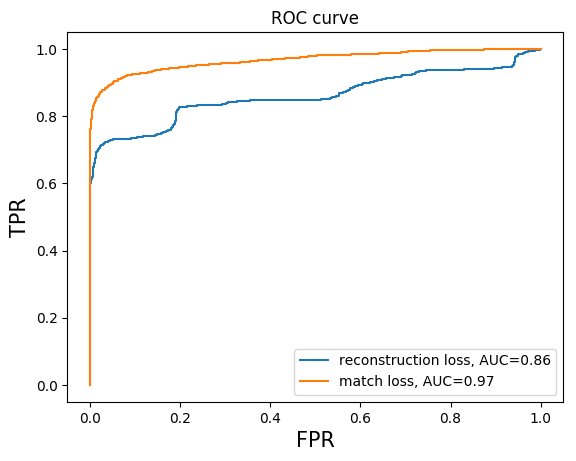

In [11]:
from sklearn import metrics
with open("../experiments/residual_ae_v2/gt/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)

label = np.concatenate([l for l in data['label'] if len(l) == 12])
score = np.concatenate([s for s in data['score'] if len(s) == 12])

fpr, tpr, thresholds = metrics.roc_curve(label, score)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"reconstruction loss, AUC={roc_auc:.2f}")

with open("../experiments/match_cost_v2/gt/N01_E1e-01_S10/result.pkl", 'rb') as f:
    data = pickle.load(f)
label = np.concatenate([l for l in data['label'] if len(l) == 12])
score = np.concatenate([s for s in data['score'] if len(s) == 12])

fpr, tpr, thresholds = metrics.roc_curve(label, score)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"match loss, AUC={roc_auc:.2f}")

plt.legend()
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.title("ROC curve")
plt.show()

In [5]:
roc_auc

0.9672052083333333